SIN-392 - Introdução ao Processamento Digital de Imagens (2022-1)

# Aula 07 - Filtragem espacial - Filtros passa-alta

Prof. João Fernando Mari

-----

<h1>Índice<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importando-as-bibliotecas-necessárias" data-toc-modified-id="Importando-as-bibliotecas-necessárias-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importando as bibliotecas necessárias</a></span></li><li><span><a href="#Criando-uma-imagem-simples" data-toc-modified-id="Criando-uma-imagem-simples-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Criando uma imagem simples</a></span><ul class="toc-item"><li><span><a href="#Plotando-a-imagem" data-toc-modified-id="Plotando-a-imagem-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Plotando a imagem</a></span></li></ul></li><li><span><a href="#Filtro-Laplaciano" data-toc-modified-id="Filtro-Laplaciano-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Filtro Laplaciano</a></span><ul class="toc-item"><li><span><a href="#Variações-do-Laplaciano" data-toc-modified-id="Variações-do-Laplaciano-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Variações do Laplaciano</a></span></li><li><span><a href="#Carregando-uma-imagem-real" data-toc-modified-id="Carregando-uma-imagem-real-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Carregando uma imagem real</a></span><ul class="toc-item"><li><span><a href="#Recortando-uma-região-de-interesse-nas-imagens" data-toc-modified-id="Recortando-uma-região-de-interesse-nas-imagens-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Recortando uma região de interesse nas imagens</a></span></li><li><span><a href="#Plotando-as-imagens-e-regiões-de-interesse" data-toc-modified-id="Plotando-as-imagens-e-regiões-de-interesse-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Plotando as imagens e regiões de interesse</a></span></li></ul></li></ul></li><li><span><a href="#Gradiente" data-toc-modified-id="Gradiente-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Gradiente</a></span><ul class="toc-item"><li><span><a href="#Operador-diagonal-de-Roberts" data-toc-modified-id="Operador-diagonal-de-Roberts-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Operador diagonal de Roberts</a></span><ul class="toc-item"><li><span><a href="#Recortando-uma-região-de-interesse-nas-imagens" data-toc-modified-id="Recortando-uma-região-de-interesse-nas-imagens-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Recortando uma região de interesse nas imagens</a></span></li><li><span><a href="#Plotando-as-imagens-e-regiões-de-interesse" data-toc-modified-id="Plotando-as-imagens-e-regiões-de-interesse-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Plotando as imagens e regiões de interesse</a></span></li></ul></li></ul></li><li><span><a href="#Operadores-de-Prewitt" data-toc-modified-id="Operadores-de-Prewitt-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Operadores de Prewitt</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Recortando-uma-região-de-interesse-nas-imagens" data-toc-modified-id="Recortando-uma-região-de-interesse-nas-imagens-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>Recortando uma região de interesse nas imagens</a></span></li><li><span><a href="#Plotando-as-imagens-e-regiões-de-interesse" data-toc-modified-id="Plotando-as-imagens-e-regiões-de-interesse-5.0.2"><span class="toc-item-num">5.0.2&nbsp;&nbsp;</span>Plotando as imagens e regiões de interesse</a></span></li></ul></li></ul></li><li><span><a href="#Operadores-de-Sobel" data-toc-modified-id="Operadores-de-Sobel-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Operadores de Sobel</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Recortando-uma-região-de-interesse-nas-imagens" data-toc-modified-id="Recortando-uma-região-de-interesse-nas-imagens-6.0.1"><span class="toc-item-num">6.0.1&nbsp;&nbsp;</span>Recortando uma região de interesse nas imagens</a></span></li><li><span><a href="#Plotando-as-imagens-e-regiões-de-interesse" data-toc-modified-id="Plotando-as-imagens-e-regiões-de-interesse-6.0.2"><span class="toc-item-num">6.0.2&nbsp;&nbsp;</span>Plotando as imagens e regiões de interesse</a></span></li></ul></li></ul></li><li><span><a href="#Roberts-Vs.-Prewitt-Vs.-Sobel" data-toc-modified-id="Roberts-Vs.-Prewitt-Vs.-Sobel-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Roberts Vs. Prewitt Vs. Sobel</a></span></li><li><span><a href="#Ruído:-Laplaciano-Vs.-Gradiente" data-toc-modified-id="Ruído:-Laplaciano-Vs.-Gradiente-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Ruído: Laplaciano Vs. Gradiente</a></span></li><li><span><a href="#Bibliografia" data-toc-modified-id="Bibliografia-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bibliografia</a></span></li></ul></div>

## Importando as bibliotecas necessárias

In [1]:
%matplotlib notebook
import numpy as np

from scipy import ndimage as ndi

from skimage import util, filters

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Criando uma imagem simples

In [2]:
img_simple = np.array([[ 0, 0, 0, 0, 6, 1, 7, 0],
                       [ 0, 7, 7, 7, 0, 6, 1, 7],
                       [ 0, 7, 0, 0, 7, 0, 6, 1],
                       [ 0, 7, 0, 0, 1, 7, 0, 6],
                       [ 0, 7, 7, 0, 0, 0, 0, 0],
                       [ 0, 7, 7, 0, 7, 7, 7, 7],
                       [ 0, 7, 7, 0, 0, 0, 0, 0],
                       [ 0, 0, 0, 0, 7, 7, 7, 7]])

# Imprime a imagem na tela
print(img_simple)

[[0 0 0 0 6 1 7 0]
 [0 7 7 7 0 6 1 7]
 [0 7 0 0 7 0 6 1]
 [0 7 0 0 1 7 0 6]
 [0 7 7 0 0 0 0 0]
 [0 7 7 0 7 7 7 7]
 [0 7 7 0 0 0 0 0]
 [0 0 0 0 7 7 7 7]]


### Plotando a imagem 

<IPython.core.display.Javascript object>


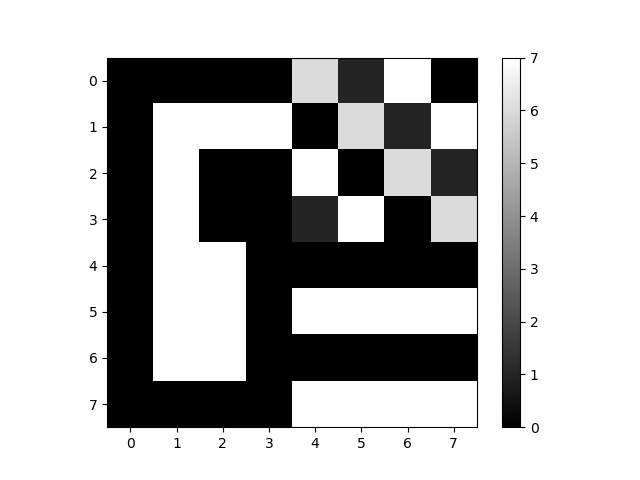

In [3]:
plt.figure()
plt.imshow(img_simple, cmap='gray', vmin=0, vmax=7)
plt.colorbar()
plt.show()

## Filtro Laplaciano

In [4]:
w_lap_4 = np.array([[0,  1, 0],
                    [1, -4, 1],
                    [0,  1, 0]])

print(w_lap_4)
print(w_lap_4.sum())

[[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]
0


In [5]:
img_lap_4 = ndi.convolve(img_simple, w_lap_4, mode='constant', cval=0)

print(img_lap_4)

[[  0   7   7  13 -23  15 -26  14]
 [  7 -14 -14 -21  26 -22  22 -26]
 [  7 -14  14  14 -27  26 -22  15]
 [  7 -14  14   1  10 -27  19 -23]
 [  7  -7 -14   7   8  14   7  13]
 [  7  -7  -7  14 -21 -14 -14 -21]
 [  7 -14 -14   7  14  14  14  14]
 [  0   7   7   7 -21 -14 -14 -21]]


<IPython.core.display.Javascript object>


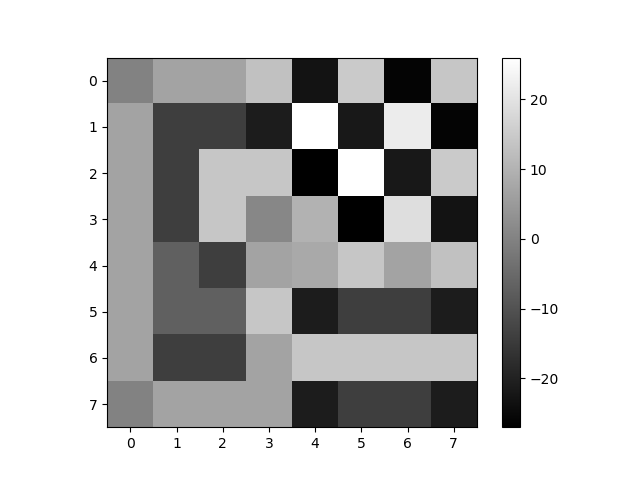

In [6]:
plt.figure()
plt.imshow(img_lap_4, cmap='gray')
plt.colorbar()
plt.show()

### Variações do Laplaciano

In [7]:
# Máscara com coeficiente central = -4
w_lap_4 = np.array([[0,  1, 0],
                    [1, -4, 1],
                    [0,  1, 0]], dtype=float)

# Máscara com coeficiente central = 4
w_lap_4_ =  w_lap_4 * (-1)

# Máscara com coeficiente central = 8
w_lap_8 = np.array([[1,  1, 1],
                    [1, -8, 1],
                    [1,  1, 1]], dtype=float)
                    
# Máscara com coeficiente central = -8
w_lap_8_ = w_lap_8 * (-1)
                    
# Lista com todos as máscaras 
w_lap_list = [w_lap_4, w_lap_4_, w_lap_8, w_lap_8_]

### Carregando uma imagem real

In [8]:
img_gray = plt.imread('./images/boat.tif')

# Informações sobre as imagens
print(img_gray.shape, img_gray.dtype, img_gray.min(), img_gray.max())

(512, 512) uint8 0 239


In [9]:
img_gray = filters.gaussian(img_gray, sigma=2)

<IPython.core.display.Javascript object>


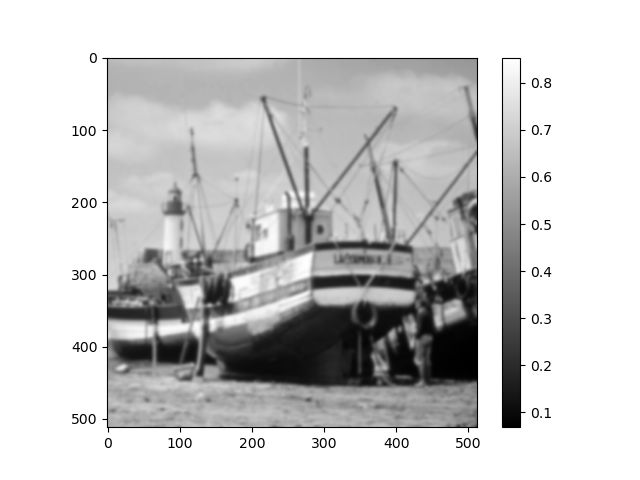

In [10]:
plt.figure()
plt.imshow(img_gray, cmap='gray')
plt.colorbar()
plt.show()

In [11]:
img_lap_list = []
for mask in w_lap_list:
    img_temp = ndi.convolve(img_gray, mask)
    
    img_lap_list.append(img_temp)    

#### Recortando uma região de interesse nas imagens

In [12]:
img_lap_rdi_list = []

for img_lap in img_lap_list:
    img_lap_rdi = img_lap[190:250, 190:250]
    
    img_lap_rdi_list.append(img_lap_rdi)      

#### Plotando as imagens e regiões de interesse

<IPython.core.display.Javascript object>


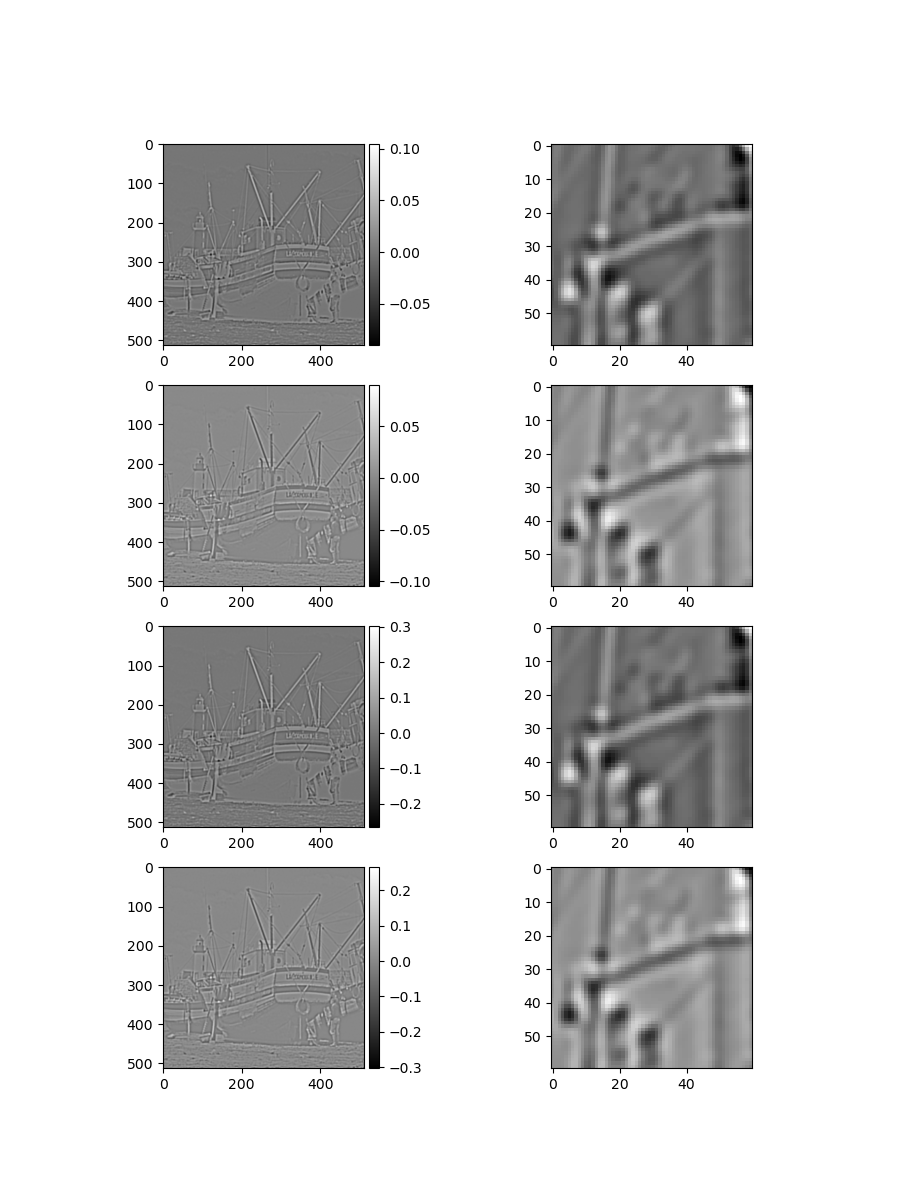

In [13]:
fig, ax  = plt.subplots(4, 2, figsize=(9, 12))
for i, (img_lap, img_lap_rdi) in enumerate(zip(img_lap_list, img_lap_rdi_list)):

    img_ = ax[i,0].imshow(img_lap, cmap='gray')
    # Barra de cores
    divider = make_axes_locatable(ax[i, 0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(img_, cax=cax)
    
    
    ax[i,1].imshow(img_lap_rdi, cmap='gray', interpolation='nearest')
    
plt.show()

## Gradiente

### Operador diagonal de Roberts

In [14]:
# Operadores diagonais de Roberts
rob_d1 = np.array([[-1., 0.],
                   [ 0., 1.]], dtype=float)

rob_d2 = np.array([[0., -1.],
                   [1.,  0.]], dtype=float)

print(rob_d1)
print()
print(rob_d2)
print()
print(rob_d1.sum(), rob_d2.sum())

[[-1.  0.]
 [ 0.  1.]]

[[ 0. -1.]
 [ 1.  0.]]

0.0 0.0


In [15]:
img_rob_d1  = ndi.convolve(img_gray, rob_d1)
img_rob_d2  = ndi.convolve(img_gray, rob_d2)

# Magnitude do gradiente (hipotenusa)
img_rob = np.sqrt(img_rob_d1**2 + img_rob_d2**2)

# Magnitude do gradiente (aproximado)
img_rob_a = np.abs(img_rob_d1) + np.abs(img_rob_d2)

#### Recortando uma região de interesse nas imagens

In [16]:
img_rob_list = [img_gray, img_rob_d1, img_rob_d2, img_rob]

img_rob_rdi_list = []

for img_rob in img_rob_list:
    img_rob_rdi = img_rob[190:250, 190:250]
    
    img_rob_rdi_list.append(img_rob_rdi)      

#### Plotando as imagens e regiões de interesse

<IPython.core.display.Javascript object>


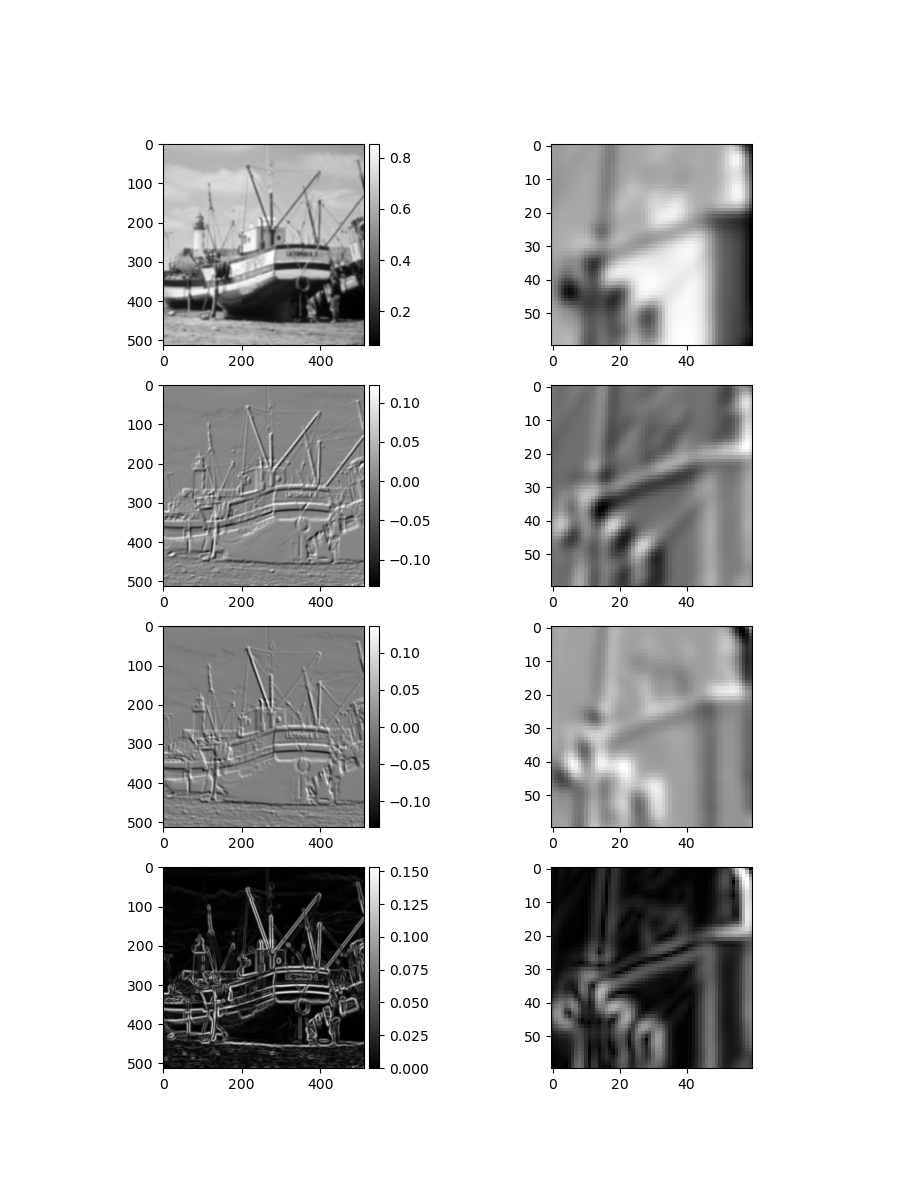

In [17]:
fig, ax  = plt.subplots(4, 2, figsize=(9, 12))
for i, (img_rob, img_rob_rdi) in enumerate(zip(img_rob_list, img_rob_rdi_list)):

    img_ = ax[i,0].imshow(img_rob, cmap='gray')
    # Barra de cores
    divider = make_axes_locatable(ax[i, 0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(img_, cax=cax)
    
    
    ax[i,1].imshow(img_rob_rdi, cmap='gray', interpolation='nearest')
    
plt.show()

## Operadores de Prewitt

In [18]:
# Operadores de Prewitt 
w_pre_h = np.array([[-1, -1, -1],
                    [ 0,  0,  0],
                    [ 1,  1,  1]], dtype=float)

w_pre_v = np.array([[-1,  0,  1],
                    [-1,  0,  1],
                    [-1,  0,  1]], dtype=float)

print(w_pre_h)
print()
print(w_pre_v)
print()
print(w_pre_h.sum(), w_pre_v.sum())

[[-1. -1. -1.]
 [ 0.  0.  0.]
 [ 1.  1.  1.]]

[[-1.  0.  1.]
 [-1.  0.  1.]
 [-1.  0.  1.]]

0.0 0.0


In [19]:
img_pre_h  = ndi.convolve(img_gray, w_pre_h)
img_pre_v  = ndi.convolve(img_gray, w_pre_v)

# Magnitude do gradiente (hipotenusa)
img_pre = np.sqrt(img_pre_h**2 + img_pre_v**2)

# Magnitude do gradiente (aproximado)
img_pre_a = np.abs(img_pre_h) + np.abs(img_pre_v)

#### Recortando uma região de interesse nas imagens

In [20]:
img_pre_list = [img_gray, img_pre_h, img_pre_v, img_pre]

img_pre_rdi_list = []

for img_pre in img_pre_list:
    img_pre_rdi = img_pre[190:250, 190:250]
    
    img_pre_rdi_list.append(img_pre_rdi)      

#### Plotando as imagens e regiões de interesse

<IPython.core.display.Javascript object>


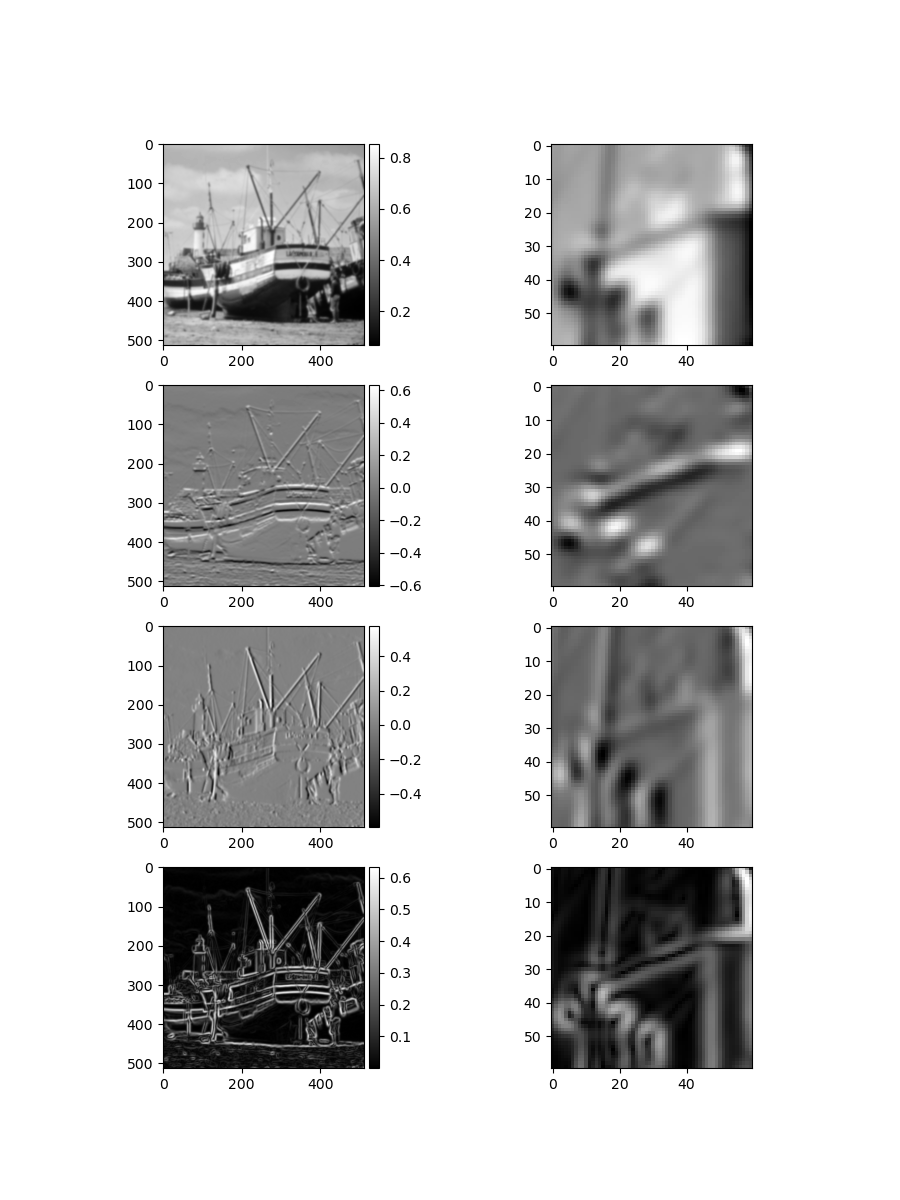

In [21]:
fig, ax  = plt.subplots(4, 2, figsize=(9, 12))
for i, (img_pre, img_pre_rdi) in enumerate(zip(img_pre_list, img_pre_rdi_list)):

    img_ = ax[i,0].imshow(img_pre, cmap='gray')
    # Barra de cores
    divider = make_axes_locatable(ax[i, 0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(img_, cax=cax)
    
    
    ax[i,1].imshow(img_pre_rdi, cmap='gray', interpolation='nearest')
    
plt.show()

## Operadores de Sobel

In [22]:
# Operadores diagonais de Sobel
w_sob_h = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]], dtype=float)

w_sob_v = np.array([[-1,  0,  1],
                    [-2,  0,  2],
                    [-1,  0,  1]], dtype=float)

print(w_sob_h)
print()
print(w_sob_v)
print()
print(w_sob_h.sum(), w_sob_v.sum())

[[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]

[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]

0.0 0.0


In [23]:
img_sob_h  = ndi.convolve(img_gray, w_sob_h)
img_sob_v  = ndi.convolve(img_gray, w_sob_v)

# Magnitude do gradiente (hipotenusa)
img_sob = np.sqrt(img_sob_h**2 + img_sob_v**2)

# Magnitude do gradiente (aproximado)
img_sob_a = np.abs(img_sob_h) + np.abs(img_sob_v)

#### Recortando uma região de interesse nas imagens

In [24]:
img_sob_list = [img_gray, img_sob_h, img_sob_v, img_sob]

img_sob_rdi_list = []

for img_sob in img_sob_list:
    img_sob_rdi = img_sob[190:250, 190:250]
    
    img_sob_rdi_list.append(img_sob_rdi)    

#### Plotando as imagens e regiões de interesse

<IPython.core.display.Javascript object>


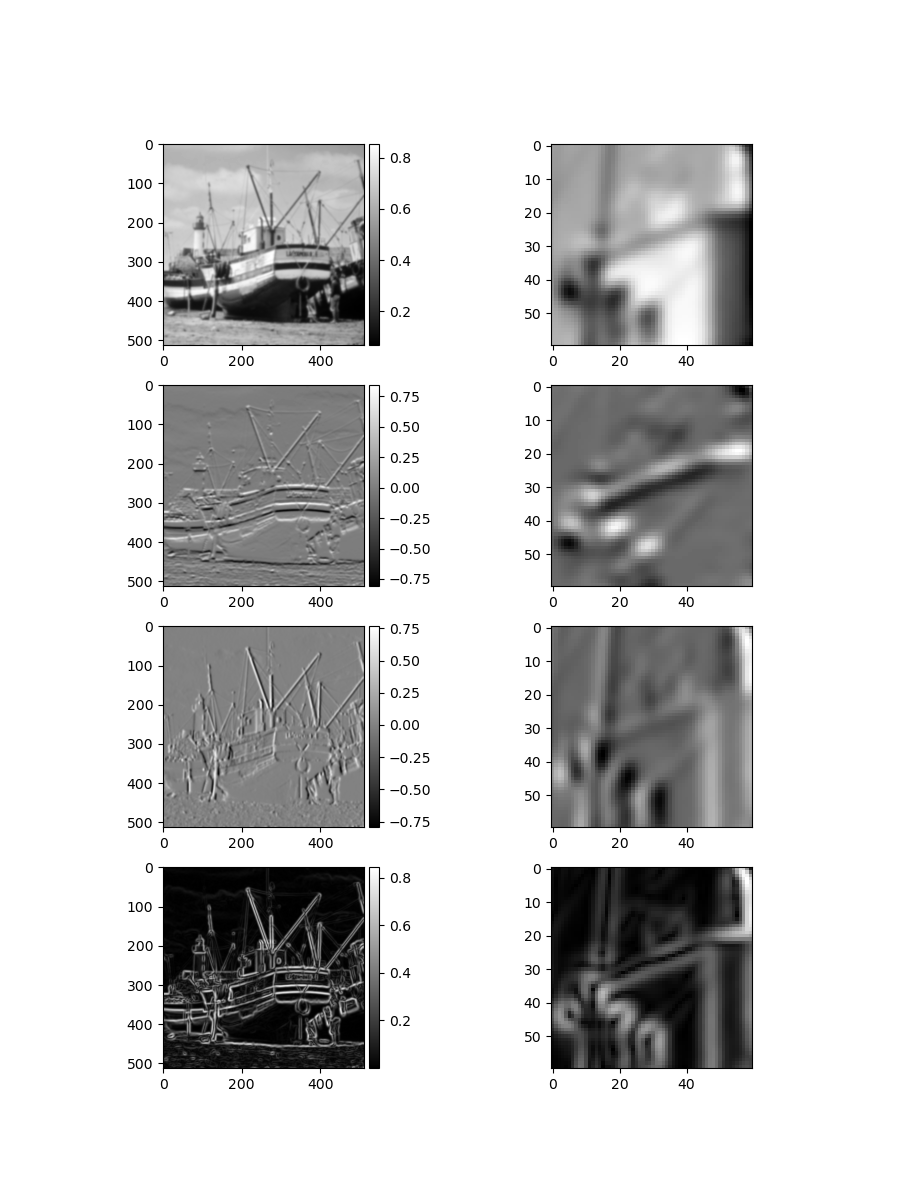

In [25]:
fig, ax  = plt.subplots(4, 2, figsize=(9, 12))
for i, (img_sob, img_sob_rdi) in enumerate(zip(img_sob_list, img_sob_rdi_list)):

    img_ = ax[i,0].imshow(img_sob, cmap='gray')
    # Barra de cores
    divider = make_axes_locatable(ax[i, 0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(img_, cax=cax)
    
    
    ax[i,1].imshow(img_sob_rdi, cmap='gray', interpolation='nearest')
    
plt.show()

## Roberts Vs. Prewitt Vs. Sobel

<IPython.core.display.Javascript object>


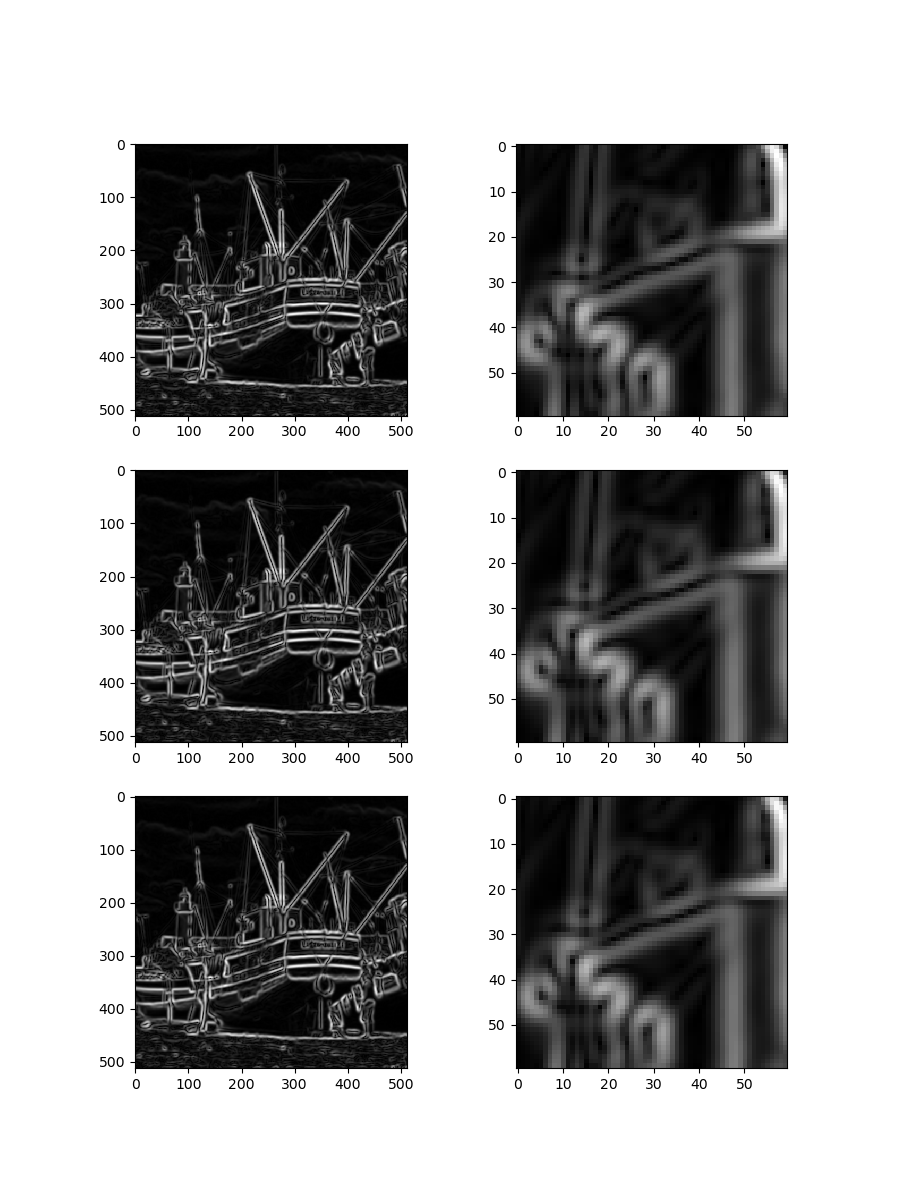

In [26]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(9, 12))

img_ = ax1.imshow(img_rob, cmap='gray', interpolation='nearest')
img_ = ax2.imshow(img_rob_rdi_list[3], cmap='gray', interpolation='nearest')
img_ = ax3.imshow(img_pre, cmap='gray', interpolation='nearest')
img_ = ax4.imshow(img_pre_rdi_list[3], cmap='gray', interpolation='nearest')
img_ = ax5.imshow(img_sob, cmap='gray', interpolation='nearest')
img_ = ax6.imshow(img_sob_rdi_list[3], cmap='gray', interpolation='nearest')

plt.show()

## Ruído: Laplaciano Vs. Gradiente

In [27]:
img_test = np.zeros([128, 512], dtype=float)
img_test[:,170:170*2] = 1
img_test[:,256] =  0
img_test[:,256+170] =  1
img_test[:,256-170] =  1

<IPython.core.display.Javascript object>


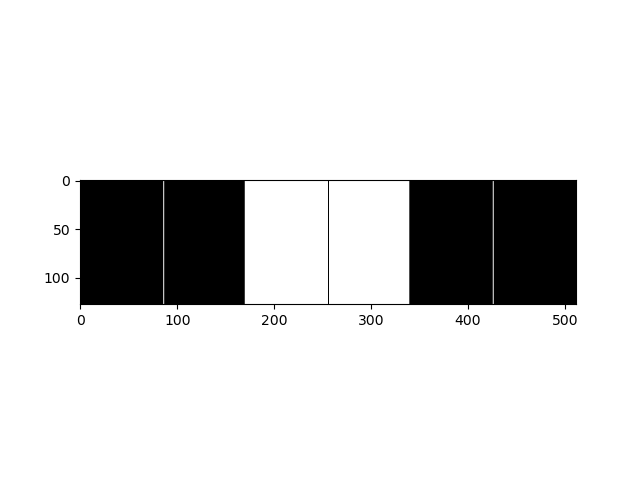

In [28]:
plt.figure()
plt.imshow(img_test, cmap='gray')
#### plt.colorbar()
plt.show()

In [29]:
img_noise_1 = util.random_noise(img_test, mode='gaussian', var=0.01)
img_noise_3 = util.random_noise(img_test, mode='gaussian', var=0.03)
img_noise_5 = util.random_noise(img_test, mode='gaussian', var=0.05)

<IPython.core.display.Javascript object>


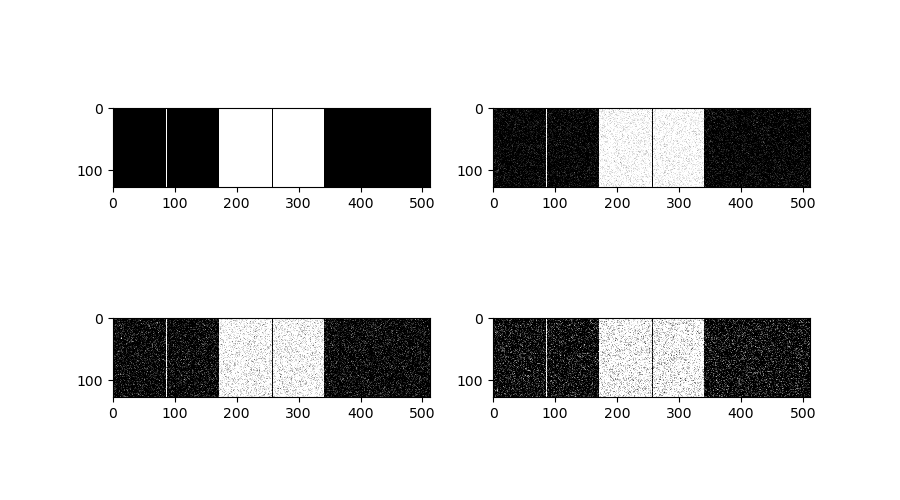

In [30]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9,5))

img_ = ax1.imshow(img_test, cmap='gray', interpolation='nearest')
img_ = ax2.imshow(img_noise_1, cmap='gray', interpolation='nearest')
img_ = ax3.imshow(img_noise_3, cmap='gray', interpolation='nearest')
img_ = ax4.imshow(img_noise_5, cmap='gray', interpolation='nearest')

plt.show()

In [31]:
img_noise_list = [img_test, img_noise_1, img_noise_3, img_noise_5]

img_noise_lap =[]

img_noise_grad = []

for img_noise in img_noise_list:
    img_lap_temp = ndi.convolve(img_noise, w_lap_4)
    
    img_noise_lap.append(img_lap_temp)
    
    img_grad_h = ndi.convolve(img_noise, w_sob_h)
    img_grad_v = ndi.convolve(img_noise, w_sob_v)
    
    img_grad = np.sqrt(img_grad_h**2 + img_grad_v**2)
    
    img_noise_grad.append(img_grad)

<IPython.core.display.Javascript object>


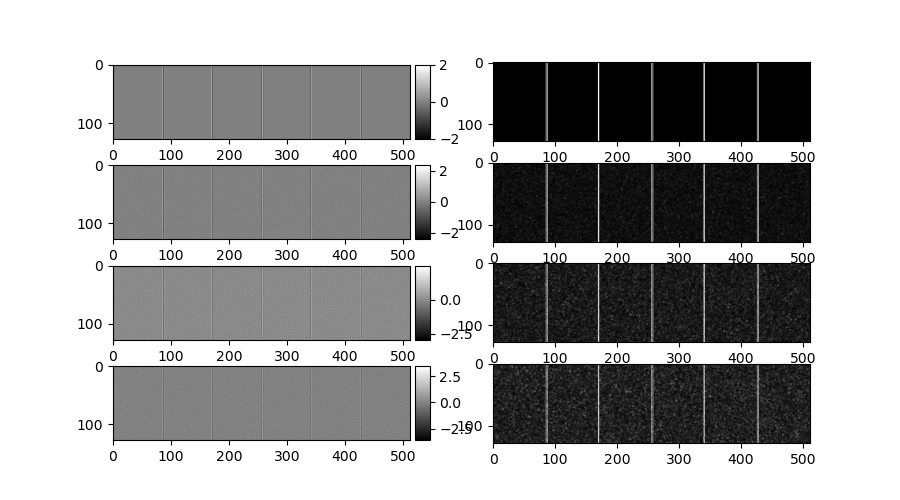

In [36]:
fig, ax  = plt.subplots(4, 2, figsize=(9, 5))
for i, (img_lap, img_grad) in enumerate(zip(img_noise_lap, img_noise_grad)):

    img_ = ax[i,0].imshow(img_lap, cmap='gray')
    # Barra de cores
    divider = make_axes_locatable(ax[i, 0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(img_, cax=cax)
    
    
    ax[i,1].imshow(img_grad, cmap='gray')
    
plt.show()

## Bibliografia
---

* MARQUES FILHO, O.; VIEIRA NETO, H. Processamento digital de imagens. Brasport, 1999.
    * Disponível para download no site do autor (Exclusivo para uso pessoal)
    * http://dainf.ct.utfpr.edu.br/~hvieir/pub.html  

* GONZALEZ, R.C.; WOODS, R.E.; Processamento Digital de Imagens. 3ª edição. Editora Pearson, 2009.

* J. E. R. Queiroz, H. M. Gomes. Introdução ao Processamento Digital de Imagens. RITA. v. 13, 2006.
    * http://www.dsc.ufcg.edu.br/~hmg/disciplinas/graduacao/vc-2016.2/Rita-Tutorial-PDI.pdf  

* Universidade de Waterloo. Image Repository.
    * http://links.uwaterloo.ca/Repository.html
    
* The USC-SIPI Image Database    
    * http://sipi.usc.edu/database/database.php
    
* Gaël Varoquaux Emmanuelle Gouillart; Olav Vahtras; Pierre de Buyl (editores). Scipy Lecture Notes. Release 2020.1
    * Disponível em: http://scipy-lectures.org/

* scikit-image. Documentação.
    * https://scikit-image.org/docs/dev/index.html

* scikit-image. Documentação. Módulo 'filters'.
    * https://scikit-image.org/docs/dev/api/skimage.filters.html
    
* NumPy. Documentação.
    * https://numpy.org/doc/stable/
        
* NumPy. Convolução
    * https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html